In [75]:
import tensorflow as tf
import numpy as np
import os
import cv2
from matplotlib import pyplot as plt

In [76]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [77]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 205 files belonging to 2 classes.


In [78]:
data_iterator = data.as_numpy_iterator()

In [79]:
batch = data_iterator.next()

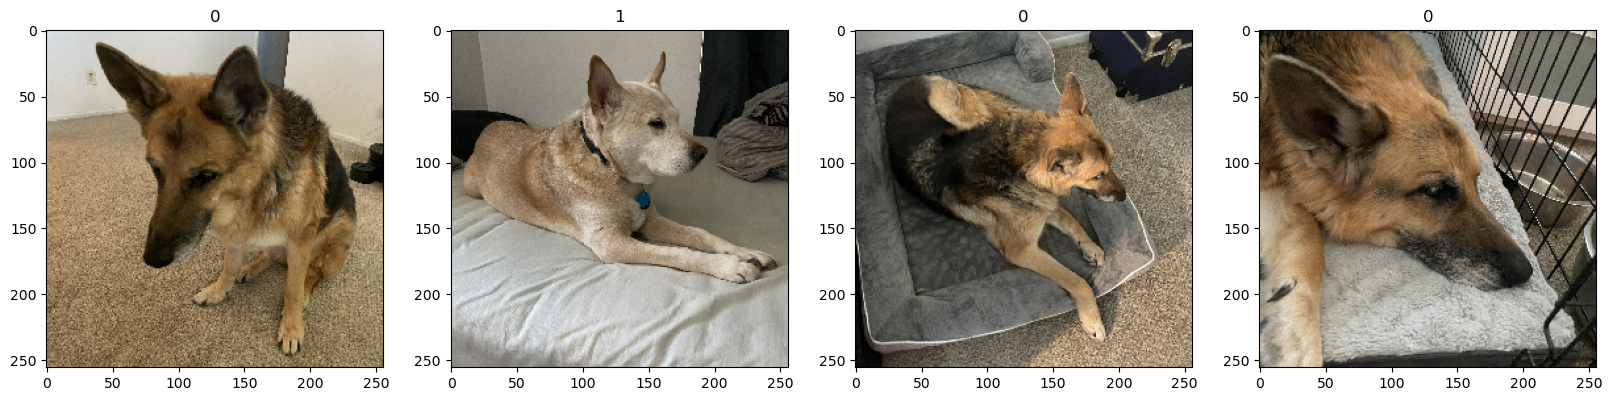

In [80]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [81]:
data = data.map(lambda x,y: (x/255, y))

In [82]:
data.as_numpy_iterator().next()

(array([[[[0.6285348 , 0.61125535, 0.59949064],
          [0.54982   , 0.53021216, 0.51844746],
          [0.63958335, 0.6199755 , 0.6082108 ],
          ...,
          [0.6995098 , 0.7348039 , 0.7151961 ],
          [0.7026961 , 0.7379902 , 0.71838236],
          [0.71829426, 0.7418237 , 0.7261374 ]],
 
         [[0.6539675 , 0.63521755, 0.62345284],
          [0.72776884, 0.71208256, 0.70031786],
          [0.60457647, 0.5888902 , 0.57712543],
          ...,
          [0.70235527, 0.7258847 , 0.7101984 ],
          [0.7253102 , 0.7488396 , 0.73315334],
          [0.7338695 , 0.7573989 , 0.7417126 ]],
 
         [[0.5741651 , 0.55847883, 0.5467141 ],
          [0.73484606, 0.7191598 , 0.7073951 ],
          [0.599483  , 0.58379674, 0.57203203],
          ...,
          [0.776957  , 0.8004864 , 0.7848001 ],
          [0.69836473, 0.72189415, 0.7062079 ],
          [0.810049  , 0.8335784 , 0.81789213]],
 
         ...,
 
         [[0.7339461 , 0.5692402 , 0.48272058],
          [0.72426

In [83]:
train_size = int(len(data)*0.7) 
val_size = int(len(data)*0.2) + 1     #validation data #adding bc not enough batches to equal the total of len(data)
test_size = int(len(data)*0.1) + 1

In [84]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [86]:
model = Sequential()

In [87]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3) ))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [88]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [89]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [90]:
logdir='logs'

In [92]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [93]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 741ms/step - accuracy: 0.4979 - loss: 0.8470 - val_accuracy: 0.4688 - val_loss: 0.7554
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 736ms/step - accuracy: 0.4771 - loss: 0.7316 - val_accuracy: 0.5000 - val_loss: 0.6854
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 721ms/step - accuracy: 0.6729 - loss: 0.6784 - val_accuracy: 0.8906 - val_loss: 0.6429
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 712ms/step - accuracy: 0.7510 - loss: 0.6449 - val_accuracy: 0.5469 - val_loss: 0.6336
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 747ms/step - accuracy: 0.6031 - loss: 0.5969 - val_accuracy: 0.7969 - val_loss: 0.5014
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 773ms/step - accuracy: 0.6906 - loss: 0.5566 - val_accuracy: 0.8125 - val_loss: 0.4888
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 699ms/step - accuracy: 0.7865 - loss: 0.4855 - val_accuracy: 0.8906 - val_loss: 0.3817
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 710ms/step - accuracy: 0.8469 - loss: 0.4044 - val_accuracy: 0.9219 - val_loss:

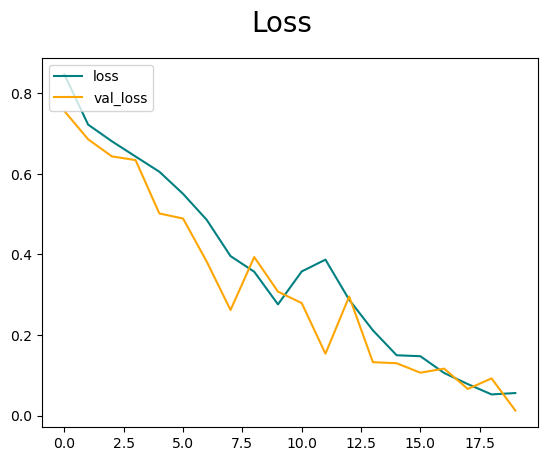

In [94]:
fig=plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

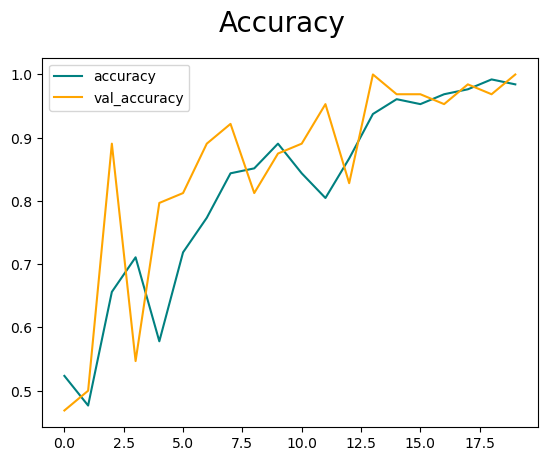

In [95]:
fig=plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [96]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [97]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [102]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [105]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 1.0, Recall: 0.9411764740943909, Accuracy: 0.9743589758872986


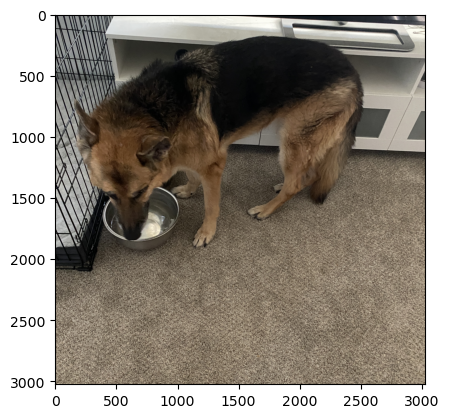

In [110]:
img = cv2.imread('Testing_Photos/IMG_0743.JPEG')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

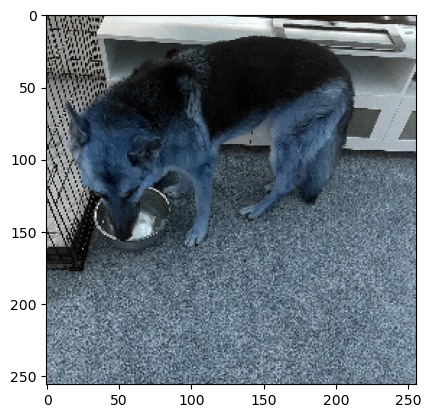

In [112]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [116]:
np.expand_dims(resize, 0)
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


In [117]:
if yhat > 0.5:
    print('Model predicted it\'s Todo')
else:
    print('Model predicted it\'s Liz')

Model predicted it's Liz


In [128]:
from tensorflow.keras.models import load_model

In [129]:
model.save(os.path.join('model', 'dogclassifier.keras'))

In [130]:
new_model = load_model(os.path.join('model', 'dogclassifier.keras'))
new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


/home/matt/anaconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


array([[0.07286838]], dtype=float32)

In [131]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print('Model predicted it\'s Todo')
else:
    print('Model predicted it\'s Liz')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Model predicted it's Liz
